# Visualization Code
Python code for visualization.  Feel free to re-use at will.

Download the jupyter notebook on **[Github](https://github.com/jpchen/makeplot)**.

1. [Matplotlib](#Matplotlib)
  1. [function](#Function)
  2. [countour](#Countour-plot)
2. [Seaborn](#Seaborn)

In [3]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

## Matplotlib

### Function Plot

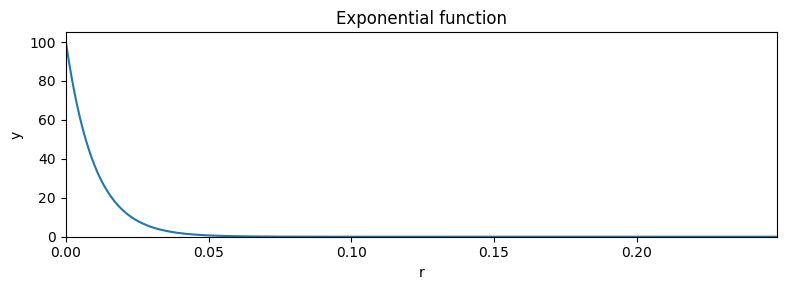

In [10]:
# ---- load data ----
# note this uses pytorch and pyro to plot distributions, but can be replaced
# with any other data
import torch
import pyro
import pyro.distributions as dist

radii = torch.arange(0, 0.25, 0.001).detach()
d = dist.Exponential(1 / 1e-2)
prob = d.log_prob(radii).detach().exp()
plt.figure(figsize=(8, 3), dpi=100).patch.set_color('white')
plt.plot(radii.numpy(), prob.numpy())
plt.xlim(0, radii.numpy().max())
plt.ylim(0, prob.numpy().max() * 1.05)
plt.xlabel('r')
plt.ylabel('y')
plt.title('Exponential function')
plt.tight_layout();

### Countour Plot

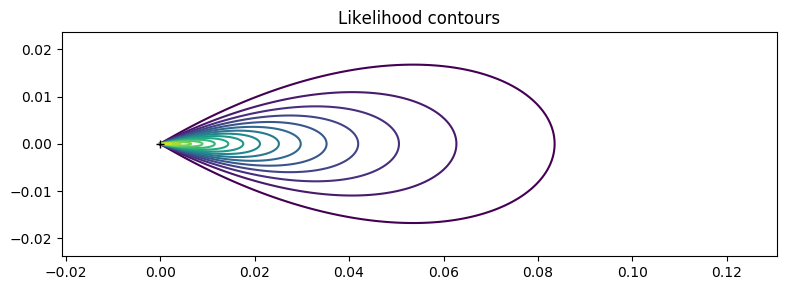

In [7]:
# ---- load data ----
# note this uses pytorch and pyro to plot distributions, but can be replaced
# with any other data
import torch
import pyro
import pyro.distributions as dist

X = torch.arange(-0.01, 0.12, 0.0002).unsqueeze(-1)
Y = torch.arange(-0.02, 0.02, 0.0002).unsqueeze(0)
shape = torch.Size((X.shape[0], Y.shape[1]))
X = X.expand(shape)
Y = Y.expand(shape)
radius = (X**2 + Y**2).sqrt()
angle = torch.atan2(Y, X)

log_prob1 = dist.Exponential(1.0 / 0.015).log_prob(radius)
log_prob2 = dist.VonMises(0.0, 40).log_prob(angle)
Z = (log_prob1 + log_prob2).exp().sqrt()
plt.figure(figsize=(8, 3), dpi=100).patch.set_color('white')
plt.contour(X.numpy(), Y.numpy(), Z.numpy(), 20)
plt.plot([0], [0], 'k+')
plt.axis('equal')
plt.title('Likelihood contours')
plt.tight_layout();

## Seaborn

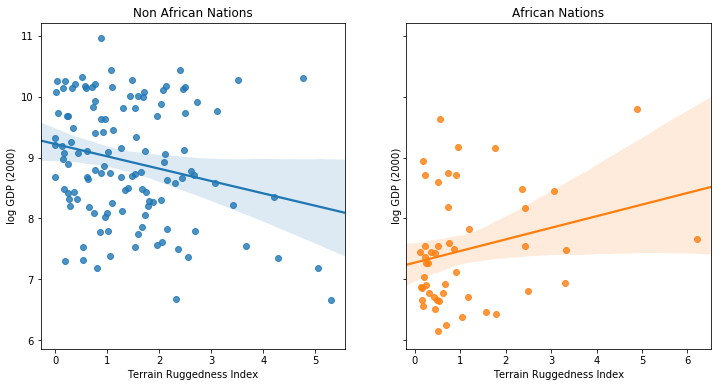

In [5]:
# --- load data ---
# note this uses panda to load real data, but can be replaced with anything
DATA_URL = "https://d2fefpcigoriu7.cloudfront.net/datasets/rugged_data.csv"
rugged_data = pd.read_csv(DATA_URL, encoding="ISO-8859-1")
# -------------

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)
african_nations = rugged_data[rugged_data["cont_africa"] == 1]
non_african_nations = rugged_data[rugged_data["cont_africa"] == 0]
sns.regplot(non_african_nations["rugged"], 
            np.log(non_african_nations["rgdppc_2000"]), 
            ax=ax[0])
ax[0].set(xlabel="Terrain Ruggedness Index",
          ylabel="log GDP (2000)",
          title="Non African Nations")
sns.regplot(african_nations["rugged"], 
            np.log(african_nations["rgdppc_2000"]), 
            ax=ax[1])
ax[1].set(xlabel="Terrain Ruggedness Index",
          ylabel="log GDP (2000)",
          title="African Nations")

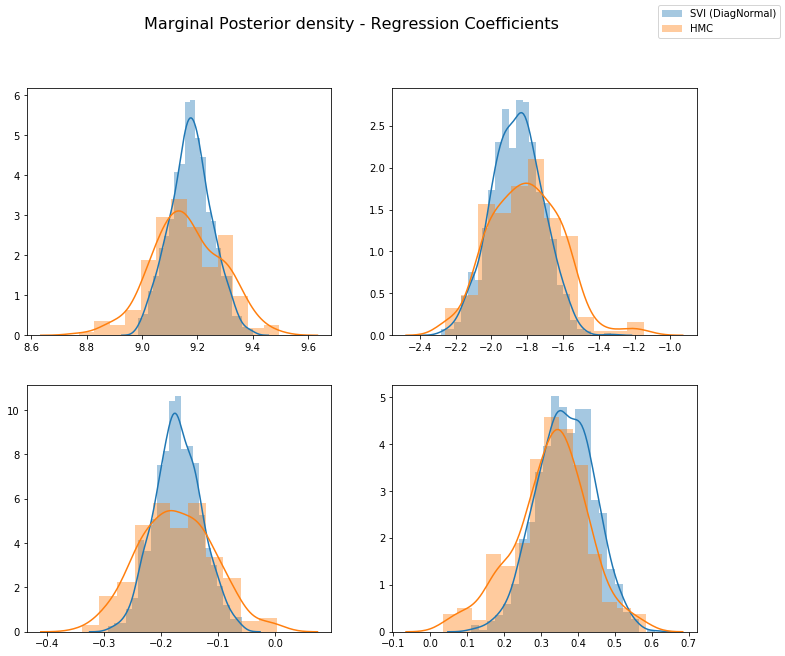

In [11]:
# data loading
hmc_empirical = np.load('hmc_data.npy')
svi_diagnorm_empirical = np.load('svi_data.npy')

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle("Marginal Posterior density - Regression Coefficients", fontsize=16)
for i, ax in enumerate(axs.reshape(-1)):
    sns.distplot(svi_diagnorm_empirical[:, i], ax=ax, label="SVI (DiagNormal)")
    sns.distplot(hmc_empirical[:, i], ax=ax, label="HMC")
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

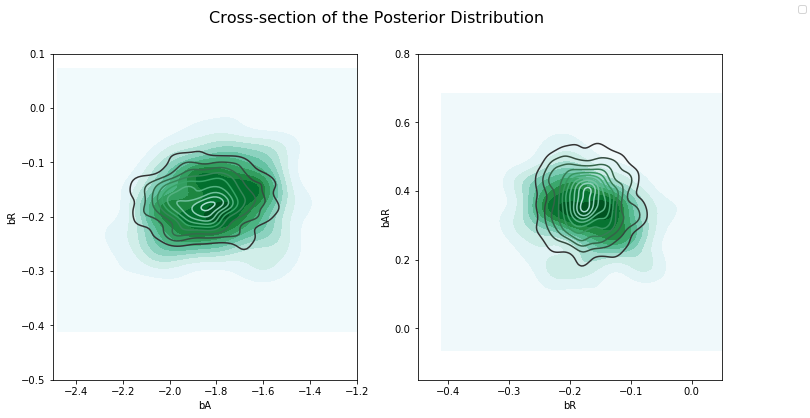

In [12]:
# data loading
hmc_empirical = np.load('hmc_data.npy')
svi_diagnorm_empirical = np.load('svi_data.npy')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Cross-section of the Posterior Distribution", fontsize=16)
sns.kdeplot(hmc_empirical[:, 1], hmc_empirical[:, 2], ax=axs[0], shade=True, label="HMC")
sns.kdeplot(svi_diagnorm_empirical[:, 1], svi_diagnorm_empirical[:, 2], ax=axs[0], label="SVI (DiagNormal)")
axs[0].set(xlabel="bA", ylabel="bR", xlim=(-2.5, -1.2), ylim=(-0.5, 0.1))
sns.kdeplot(hmc_empirical[:, 2], hmc_empirical[:, 3], ax=axs[1], shade=True, label="HMC")
sns.kdeplot(svi_diagnorm_empirical[:, 2], svi_diagnorm_empirical[:, 3], ax=axs[1], label="SVI (DiagNormal)")
axs[1].set(xlabel="bR", ylabel="bAR", xlim=(-0.45, 0.05), ylim=(-0.15, 0.8))
handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')